In [2]:
from datetime import timedelta, datetime
import copy 
import PIL
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates


import observatories
import data
import events
import analysis
import const
import reference
import correlation
import download

%load_ext autoreload
%autoreload 2

why more stations better, and sensitivity to tiny time shifts

TODO correlation between those, summed curves 

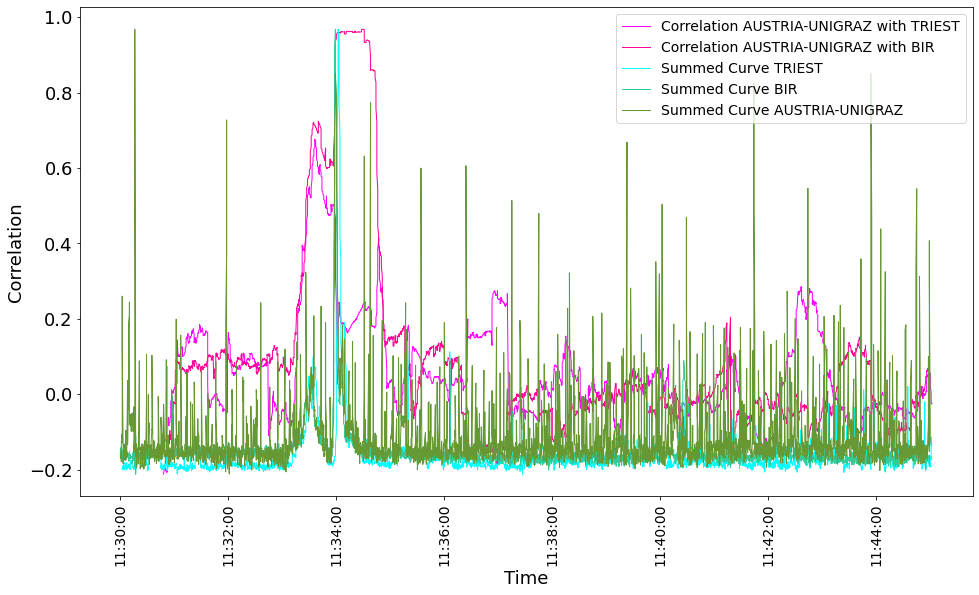

In [3]:
year = 2017
month = 6
day = 1
time = "11:34:00"
obs = [observatories.uni_graz, observatories.triest, observatories.bir]  #observatories.austria

curves = []
dps = []
cors = []
for o in obs[1:]:
    dp1 = data.createFromTime(year, month, day, time, obs[0], const.spectral_range)
    dp2 = data.createFromTime(year, month, day, time, o, const.spectral_range)
    dp1.createSummedCurve(const.spectral_range)
    dp2.createSummedCurve(const.spectral_range)
    dp1.flattenSummedCurve()
    dp2.flattenSummedCurve()
    cor = correlation.Correlation(dp1, dp2, day)
    cor.calculatePeaks()
    curves.append([cor.time_axis, cor.data_curve, o])
    dps.append(dp2)  
    cors.append(cor)

dps.append(dp1)

fig, ax = plt.subplots(figsize=(16,9))
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=60)

cs = []
for jj, j in enumerate(cors):
    c = j.plotCurve(ax, label=f"Correlation {j.data_point_1.observatory.name} with {j.data_point_2.observatory.name}", 
                    color=(1,0,1-jj*0.4))
    cs.append(c)

for ii, i in enumerate(dps):
    c = i.plotSummedCurve(ax, label=f"Summed Curve {i.observatory.name}", color=(ii*0.2,1 - ii * 0.2, 1 -ii*0.4))
    cs.append(c)

plots = [obj for subl in cs for obj in subl]
labs = [i.get_label() for i in plots]

ax.set_ylabel("Correlation")
ax.set_xlabel("Time")

plt.legend(plots, labs, loc="upper right")
plt.show()

mask frequencies

1 with mask, 1 without mask

2022_1_9_AUSTRIA-UNIGRAZ_SWISS-Landschlacht_45_nobg_bintime_4_flatten_2000.png
[]


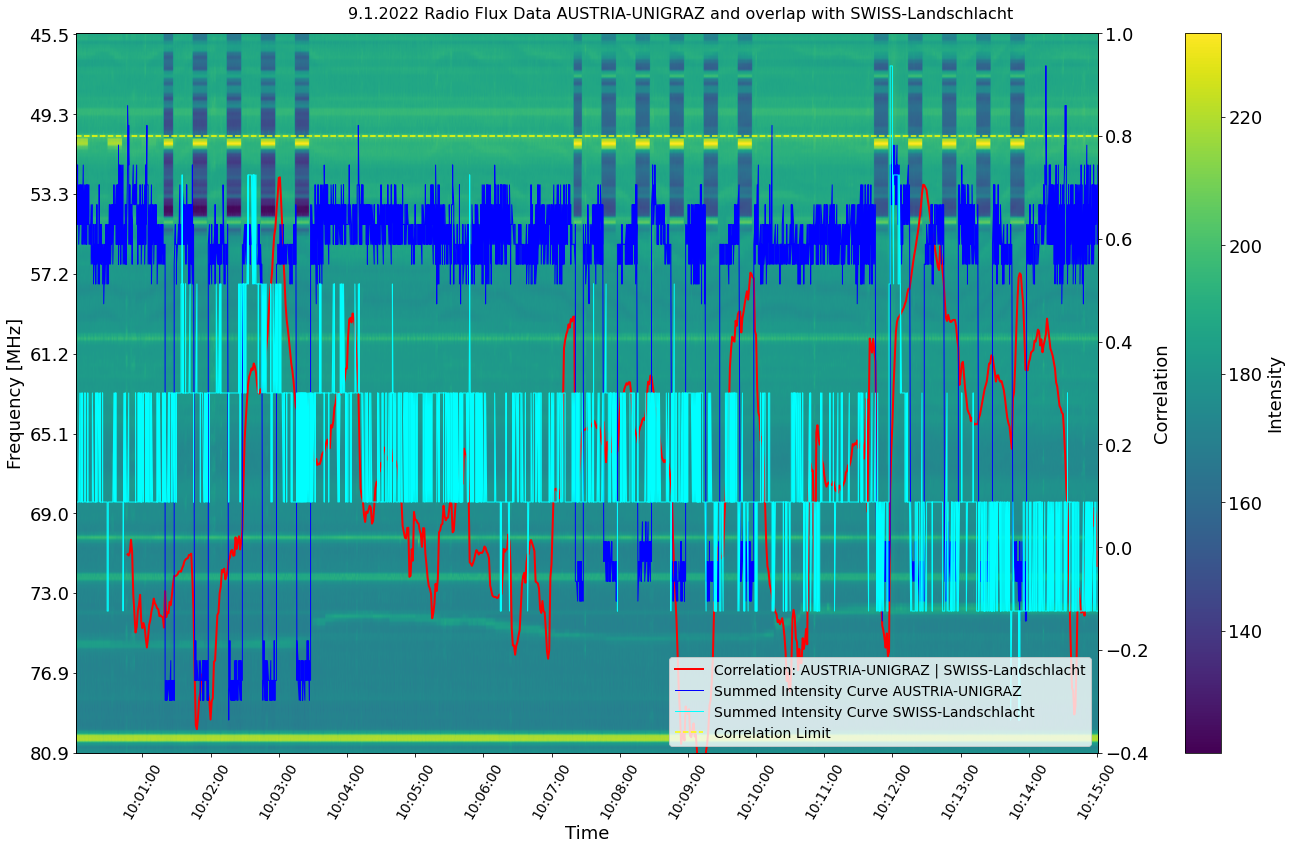

2022_1_9_AUSTRIA-UNIGRAZ_SWISS-Landschlacht_45_nobg_bintime_4_flatten_2000.png
[['III', 10:12:16, 10:13:12, '0.8838']]


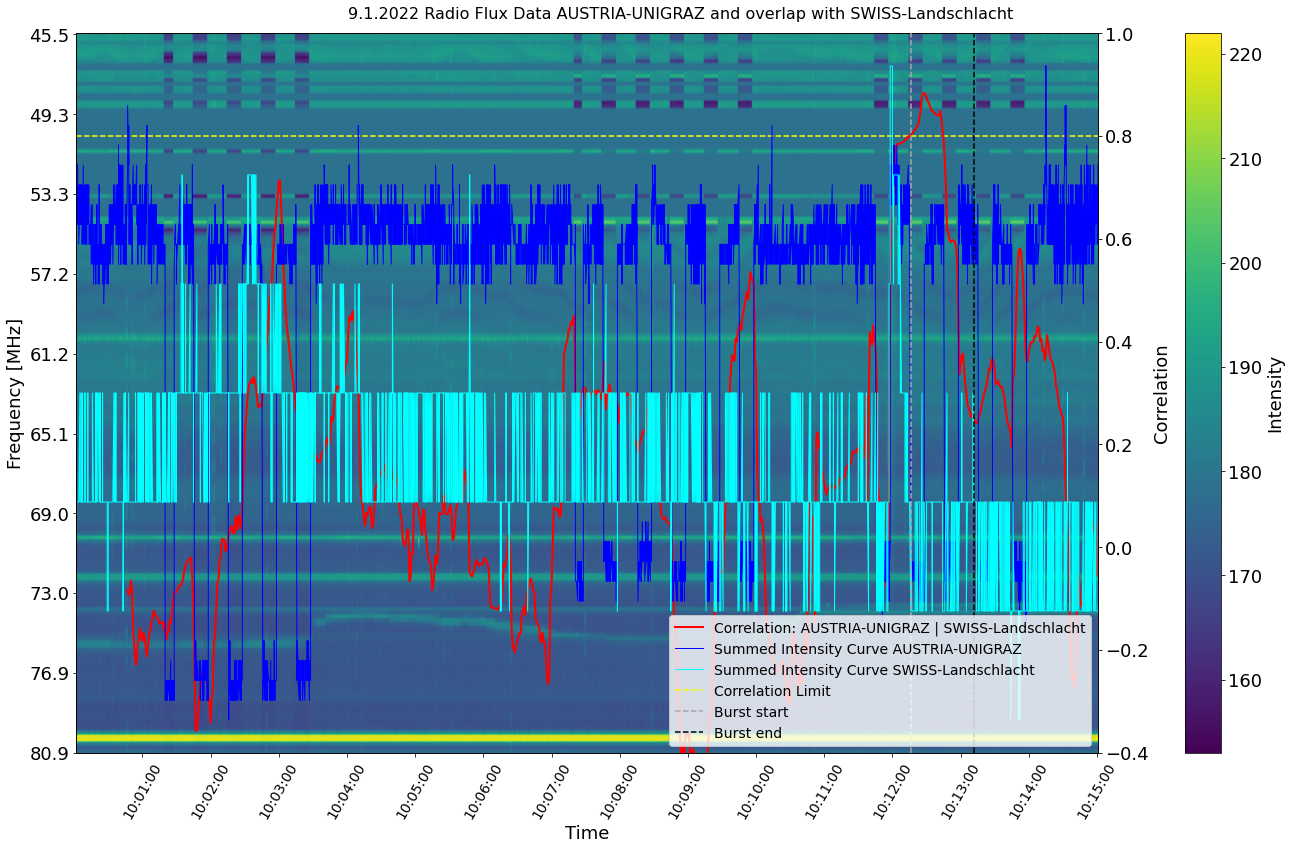

In [34]:
year = 2022
month = 1
day = 9
time = "10:12:00"
obs = [observatories.uni_graz, observatories.swiss_landschlacht]

dp1, dp2, cor = analysis.calcPoint(year, month, day, time, obs[0], obs[1], mask_frq=False)
analysis.plotEverything(dp1,dp2,cor)

dp1, dp2, cor = analysis.calcPoint(year, month, day, time, obs[0], obs[1], mask_frq=True)
analysis.plotEverything(dp1,dp2,cor)

rolling window several curves on top of each other 40 - 100 - 180 - 220 - 260

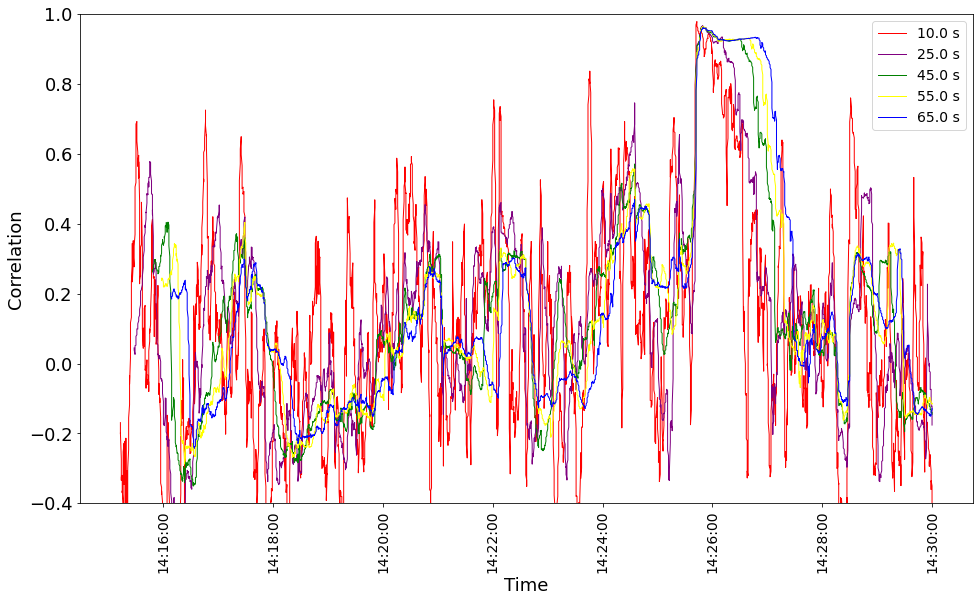

In [28]:
year = 2020
month = 12
day = 30
time = "14:26:00"
obs = [observatories.uni_graz, observatories.glasgow]

download.downloadFullDay(year, month, day, obs)

r_w = [40, 100, 180, 220, 260]

fig, ax = plt.subplots(figsize=(16,9))
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=60)
cs = []
for i in r_w:
    dp1 = data.createFromTime(year, month, day, time, obs[0], const.spectral_range)
    dp2 = data.createFromTime(year, month, day, time, obs[1], const.spectral_range)
    cor = correlation.Correlation(dp1, dp2, day, _r_window=i)
    cor.calculatePeaks()
    curves.append([cor.data_curve, i])
    timeaxis = cor.time_axis
    c = cor.plotCurve(ax, label=f"{i/4} s")
    cs.append(c)
plots = [obj for subl in cs for obj in subl]
labs = [i.get_label() for i in plots]
plt.ylim(-0.4, 1)
plt.ylabel("Correlation")
plt.xlabel("Time")
plt.legend(plots, labs, loc='best')
plt.show()